In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [113]:
df = pd.read_csv('data/prophetData.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()
df = df[-800:]
#df['y'] = df['y']*100

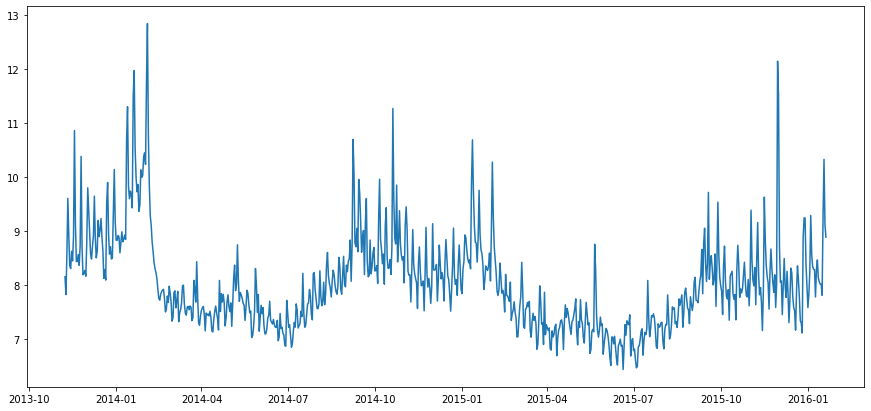

In [114]:
plt.figure(figsize=(15,7))
plt.plot(df['ds'], df['y'])
plt.show();

In [115]:
validation_fraction = 0.2

validation_size = int(df.shape[0] * validation_fraction)
df_train = df.iloc[:-validation_size]
df_validation = df.iloc[-validation_size:]
print(df_train.shape)
print(df_validation.shape)

(640, 2)
(160, 2)


In [116]:
import importlib
import Chronos


In [125]:
importlib.reload(Chronos)
my_cr = Chronos.Chronos(G=400,
                        p_m= 0.1, 
                        r_m = 0.1,
                        yearly_seasonality=5,
                        monthly_seasonality=5)

In [126]:
my_cr = my_cr.fit(df_train)

0.9065476720444795
population initalized


In [127]:
bla = my_cr.best_individual.copy()
bla

array([ 7.84131925e+00,  1.80907435e-05, -1.95200341e-01, -1.75695776e-02,
       -6.55229098e-03, -5.98723431e-02, -3.83643525e-02,  3.07333236e-04,
        1.11714231e-02, -1.39092085e-02,  4.00749902e-03, -2.30221806e-02,
       -3.04891115e-02,  3.67930900e-03])

In [128]:
#my_cr.best_individual[1] = 0.001

In [129]:
predict_df = df_train.copy()
predict_df = my_cr.predict(predict_df)
predict_df.head()

,ds,y,yhat
2105,2013-11-08,8.157657,7.841043
2106,2013-11-09,7.829233,7.810071
2107,2013-11-10,8.573952,7.734921
2108,2013-11-11,9.611329,7.769702
2109,2013-11-12,8.923858,7.688592


In [130]:
predict_df.tail()

,ds,y,yhat
2740,2015-08-08,7.007601,8.254969
2741,2015-08-09,7.073270,8.348929
2742,2015-08-10,7.265430,8.306314
2743,2015-08-11,7.602401,8.376820
2744,2015-08-12,7.557473,8.349620


In [131]:
from Chronos import CHRONOS_MSE
CHRONOS_MSE(predict_df['y'], predict_df['yhat'])

0.724498162752663

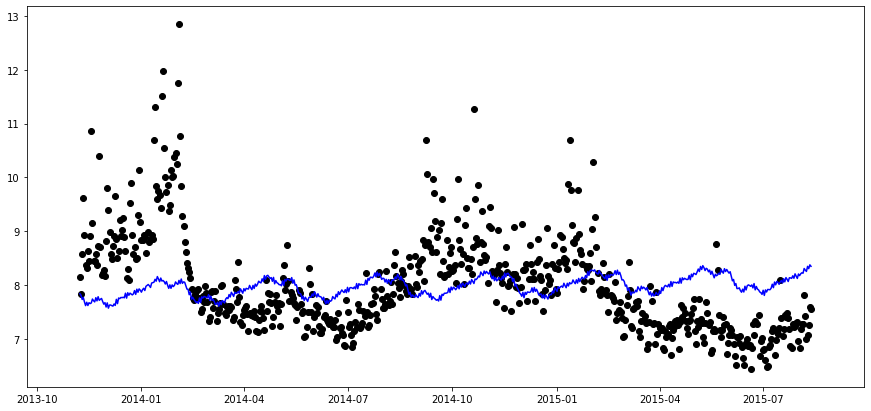

In [132]:
plt.figure(figsize=(15,7))
plt.scatter(predict_df['ds'], predict_df['y'], c="black")
plt.plot(predict_df['ds'], predict_df['yhat'], c="blue")
plt.show();

In [133]:
predict_df = df_validation.copy()
predict_df = my_cr.predict(predict_df)
predict_df.head()

,ds,y,yhat
2745,2015-08-13,7.582229,8.359042
2746,2015-08-14,7.289611,8.405874
2747,2015-08-15,7.330405,8.350750
2748,2015-08-16,7.221105,8.302656
2749,2015-08-17,7.431300,8.348236


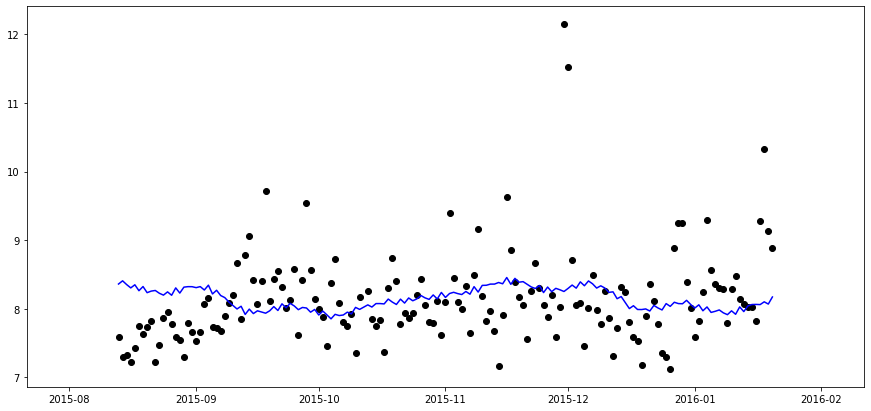

In [134]:
plt.figure(figsize=(15,7))
plt.scatter(predict_df['ds'], predict_df['y'], c="black")
plt.plot(predict_df['ds'], predict_df['yhat'], c="blue")
plt.show();